In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [55]:
data=pd.read_csv("data.txt",header=-1)
data.columns=["population","profit"]
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


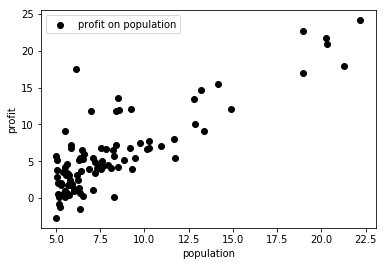

In [16]:
plt.scatter(data[0].tolist(),data[1].tolist(),label='profit on population',color='k')
plt.xlabel('population')
plt.ylabel('profit')
plt.legend()
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
0    97 non-null float64
1    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [31]:
X=data.iloc[:,0]
y=data.iloc[:,1]
X=np.asanyarray(X)
y=np.asanyarray(y)

In [32]:
thet=np.zeros((2,(len(X))))

In [33]:
def cost_function(X,y,theta):
    J=np.sum(((theta[0] + theta[1] * X) - y)**2)/(2*len(X))
    print("the cost value is : ",J)
cost_function(X,y,thet)

the cost value at is :  32.072733877455676


In [80]:
def gradientDescent(X,y,theta,lr=0.01,iteration=20):
    i=0
    while i<iteration:
        diff = (theta[0] + theta[1] * X - y)
        a0 = 2 * np.sum(diff) / len(X)
        a1 = 2 * np.sum(diff * X) / len(X)
        theta[0]= theta[0] -lr * a0
        theta[1] = theta[1] - lr *a1
        cost_function(X,y,theta)
        i=i+1
       
    return theta     

In [35]:
m=gradientDescent(X,y,thet)
m

the cost value at is :  16.769642371667477
the cost value at is :  10.407579751768974
the cost value at is :  7.7591834803023465
the cost value at is :  6.653287534646753
the cost value at is :  6.188105823037992
the cost value at is :  5.989084519364204
the cost value at is :  5.9006537729257875
the cost value at is :  5.858197920163226
the cost value at is :  5.834878785201405
the cost value at is :  5.819548934223245
the cost value at is :  5.807578027277277
the cost value at is :  5.797042577385663
the cost value at is :  5.787143381054757
the cost value at is :  5.777548203870703
the cost value at is :  5.768118767375579
the cost value at is :  5.758797354060333
the cost value at is :  5.749559709152846
the cost value at is :  5.740395478534908
the cost value at is :  5.731300083688731
the cost value at is :  5.722271346971492


array([[-0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.19732262, -0.19732262,
        -0.19732262, -0.19732262, -0.19732262, -0.1

In [36]:
intercept=m[0][0]
coff=m[1][0]
print(coff,intercept)

0.821360907108657 -0.19732261554827576


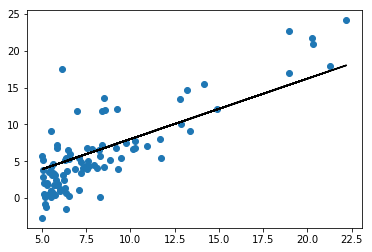

In [38]:
plt.scatter(X,y)
plt.plot(X,coff*X+intercept,"k")

In [57]:
msk = np.random.rand(len(data)) < 0.8
trai = data[msk]
test = data[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
trai_x = np.asanyarray(trai[['population']])
trai_y = np.asanyarray(trai[['profit']])
regr.fit (trai_x, trai_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.22178295]]
Intercept:  [-4.00775148]


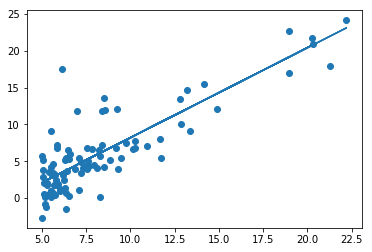

In [58]:
plt.scatter(X,y)
plt.plot(trai_x,regr.coef_*trai_x+regr.intercept_)
plt.show()

In [41]:
print("prices for population of 35000 : ",(regr.coef_*3.5+regr.intercept_)*10000)
print("prices for population of 70000 : ",(regr.coef_*7+regr.intercept_)*10000)

prices for population of 35000 :  [[3577.2270668]]
prices for population of 70000 :  [[45074.76658327]]


In [79]:
((regr.coef_*X+regr.intercept_)-y).mean()

0.122618011871605